In [73]:
!pip install prophet

In [51]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick

In [34]:

# Load all the uploaded CSV files


df_2015 = pd.read_csv (r'C:\Users\memon\.anaconda\Project 1\insurance and medicaid\2015.csv' )

df_2016 = pd.read_csv (r'C:\Users\memon\.anaconda\Project 1\insurance and medicaid\2016.csv')
df_2017 = pd.read_csv (r'C:\Users\memon\.anaconda\Project 1\insurance and medicaid\2017.csv')
df_2018 = pd.read_csv (r'C:\Users\memon\.anaconda\Project 1\insurance and medicaid\2018.csv')
df_2019 = pd.read_csv (r'C:\Users\memon\.anaconda\Project 1\insurance and medicaid\2019.csv')


df_2019.head(50)



,Location,Medicaid,Uninsured,Total
0,Alabama,929500,460400,"1,389,900.00"
1,Alaska,149400,80500,"229,900.00"
2,Arizona,1489600,789100,"2,278,700.00"
3,Arkansas,767000,265800,"1,032,800.00"
4,California,9790000,3005400,"12,795,400.00"
5,Colorado,942300,436700,"1,379,000.00"
6,Connecticut,743900,204500,"948,400.00"
7,Delaware,191400,62500,"253,900.00"
8,District of Columbia,171000,24200,"195,200.00"
9,Florida,3643200,2757000,"6,400,200.00"


In [15]:
df_2018.head(50)

,Location,Medicaid,Uninsured,Total
0,Alabama,928300,483400,1411700
1,Alaska,151200,85400,236600
2,Arizona,1568300,743500,2311800
3,Arkansas,796600,242000,1038600
4,California,10194300,2774100,12968400
5,Colorado,1027200,425200,1452400
6,Connecticut,715200,185100,900300
7,Delaware,200500,54000,254500
8,District of Columbia,184800,21200,206000
9,Florida,3759600,2741500,6501100


In [16]:
df_2017.head(50)

,Location,Medicaid,Uninsured,Total
0,Alabama,977900,452600,1430500
1,Alaska,156400,98700,255100
2,Arizona,1526400,686400,2212800
3,Arkansas,784600,233100,1017700
4,California,10238500,2799600,13038100
5,Colorado,1073700,409800,1483500
6,Connecticut,706200,196500,902700
7,Delaware,166900,52000,218900
8,District of Columbia,184500,23900,208400
9,Florida,3819300,2653500,6472800


In [17]:
df_2016.head(50)

,Location,Medicaid,Uninsured,Total
0,Alabama,952800,435200,1388000
1,Alaska,137900,103500,241400
2,Arizona,1585800,674800,2260600
3,Arkansas,771800,232200,1004000
4,California,10466200,2841000,13307200
5,Colorado,1045500,413700,1459200
6,Connecticut,700500,170000,870500
7,Delaware,178900,53500,232400
8,District of Columbia,183900,26000,209900
9,Florida,3825400,2524000,6349400


In [19]:
df_2015.head(50)

,Location,Medicaid,Uninsured,Total
0,Alabama,948700,480300,1429000
1,Alaska,140000,102800,242800
2,Arizona,1463900,736600,2200500
3,Arkansas,738400,271500,1009900
4,California,10173800,3276000,13449800
5,Colorado,1021200,430000,1451200
6,Connecticut,683000,210900,893900
7,Delaware,188000,51500,239500
8,District of Columbia,168000,23600,191600
9,Florida,3724900,2653500,6378400


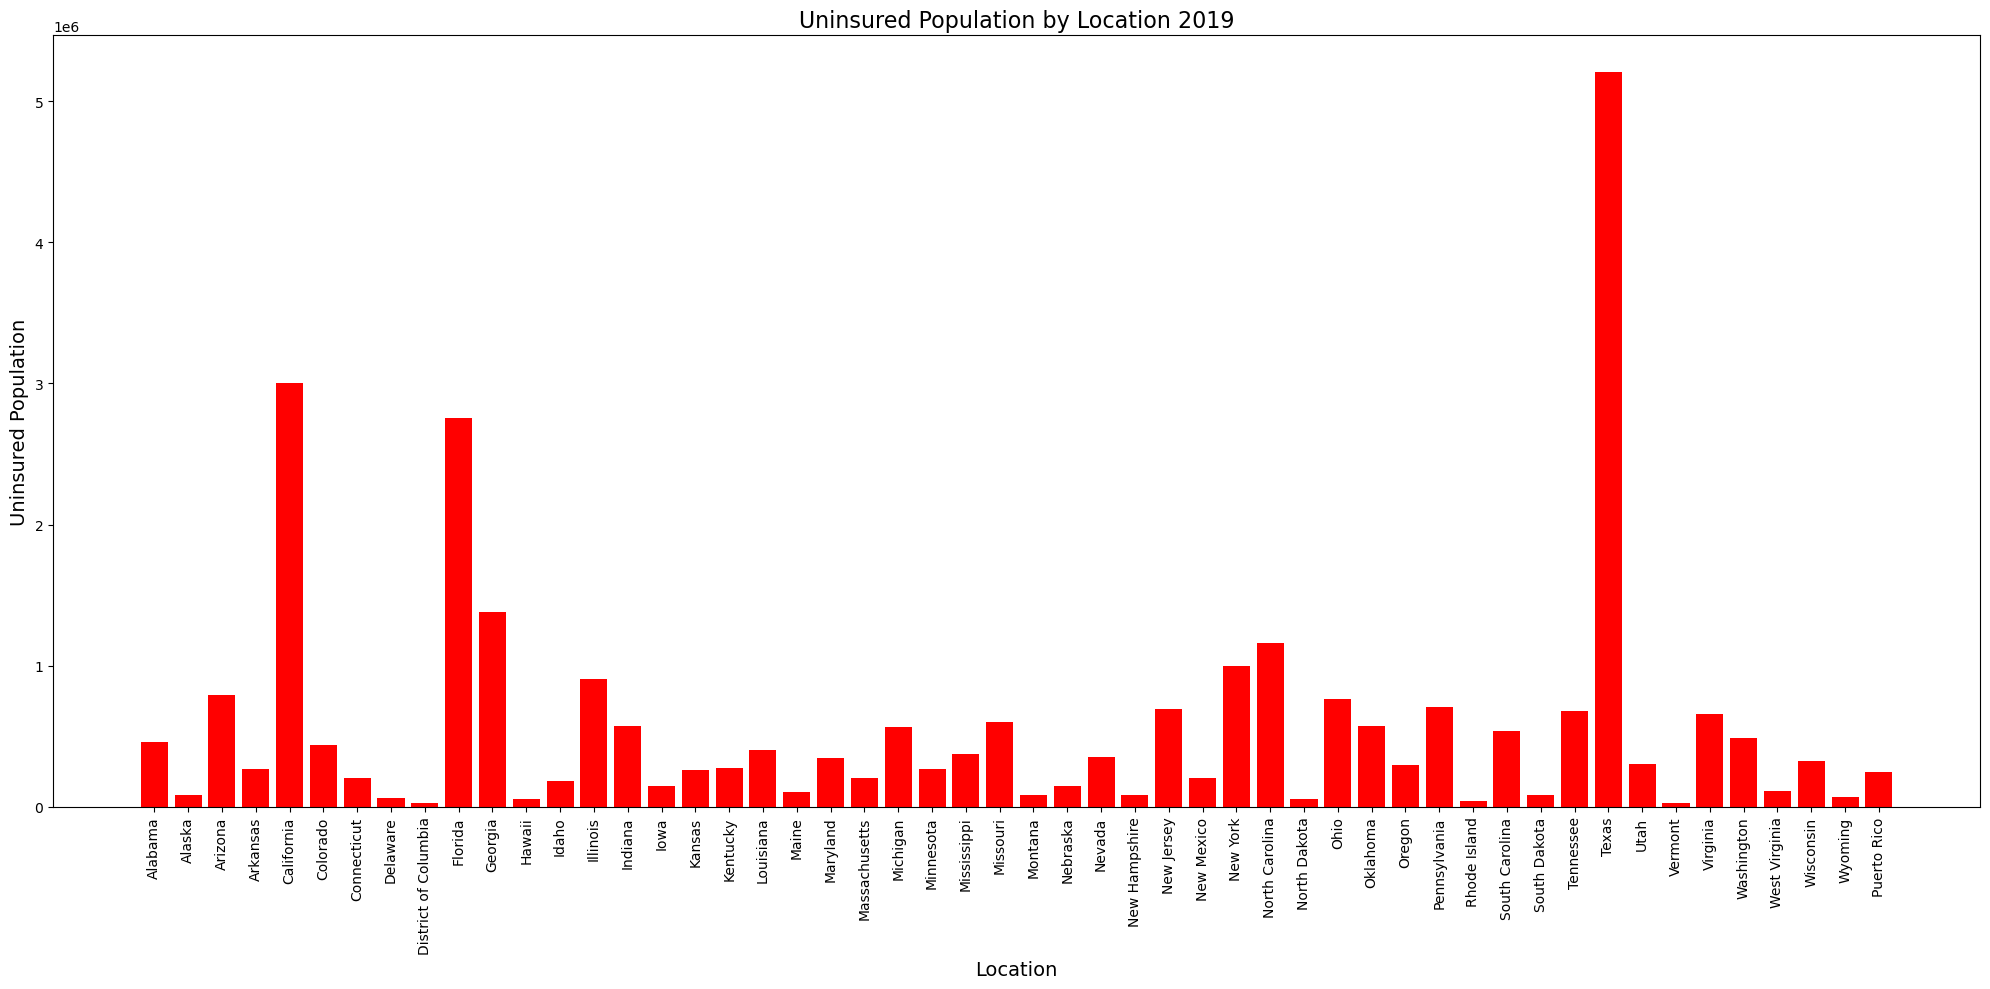

In [20]:
# Plot uninsured people by location
# Convert Medicaid and Uninsured columns to numeric


# Drop rows with NaN values in the Uninsured column
# Plot uninsured people by location with commas for thousands separators
plt.figure(figsize=(20, 10))  # Increase the figure size
bars = plt.bar(df_2019['Location'], df_2019['Uninsured'], color='red')
plt.xlabel('Location', fontsize=14)  # Increase the font size of the labels
plt.ylabel('Uninsured Population', fontsize=14)
plt.title('Uninsured Population by Location 2019', fontsize=16)
plt.xticks(rotation=90, fontsize=10)  # Rotate labels for better spacing and adjust font size
plt.yticks(fontsize=10)
plt.tight_layout()

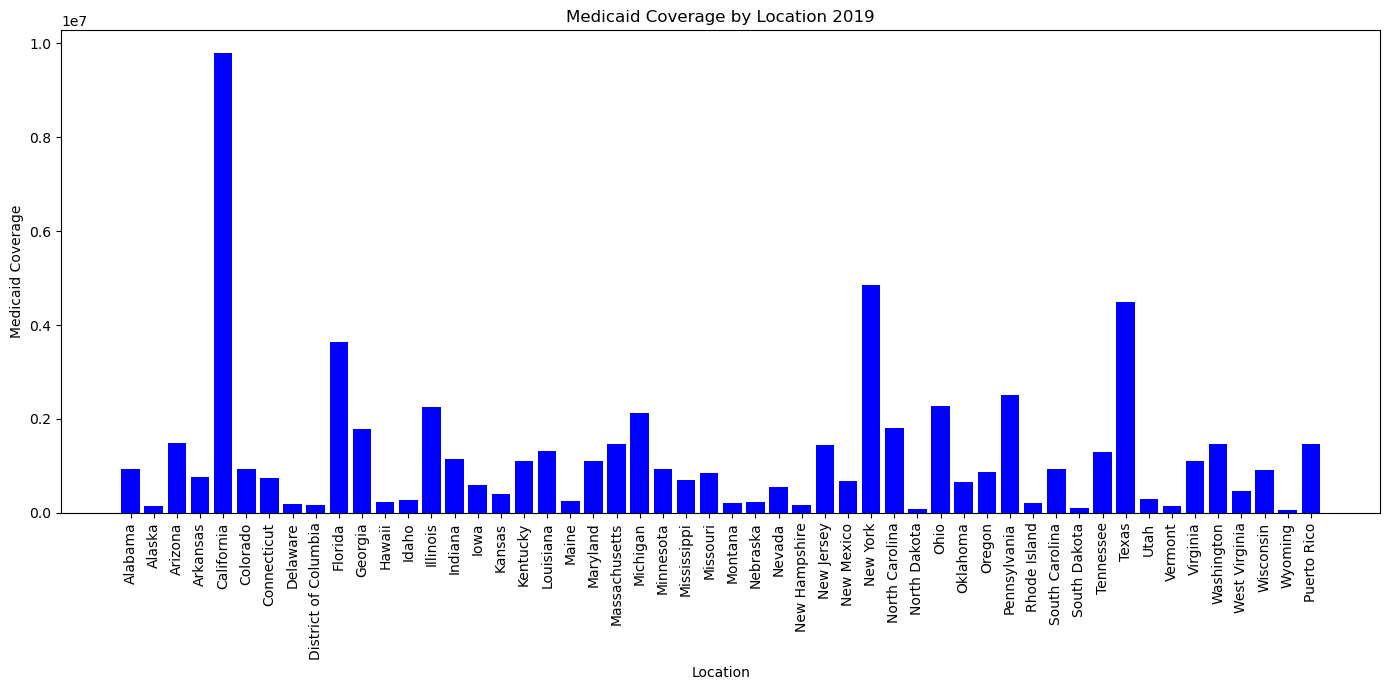

In [21]:
# Plot Medicaid coverage by location
plt.figure(figsize=(14, 7))
plt.bar(df_2019['Location'], df_2019['Medicaid'], color='blue')
plt.xlabel('Location')
plt.ylabel('Medicaid Coverage')
plt.title('Medicaid Coverage by Location 2019')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

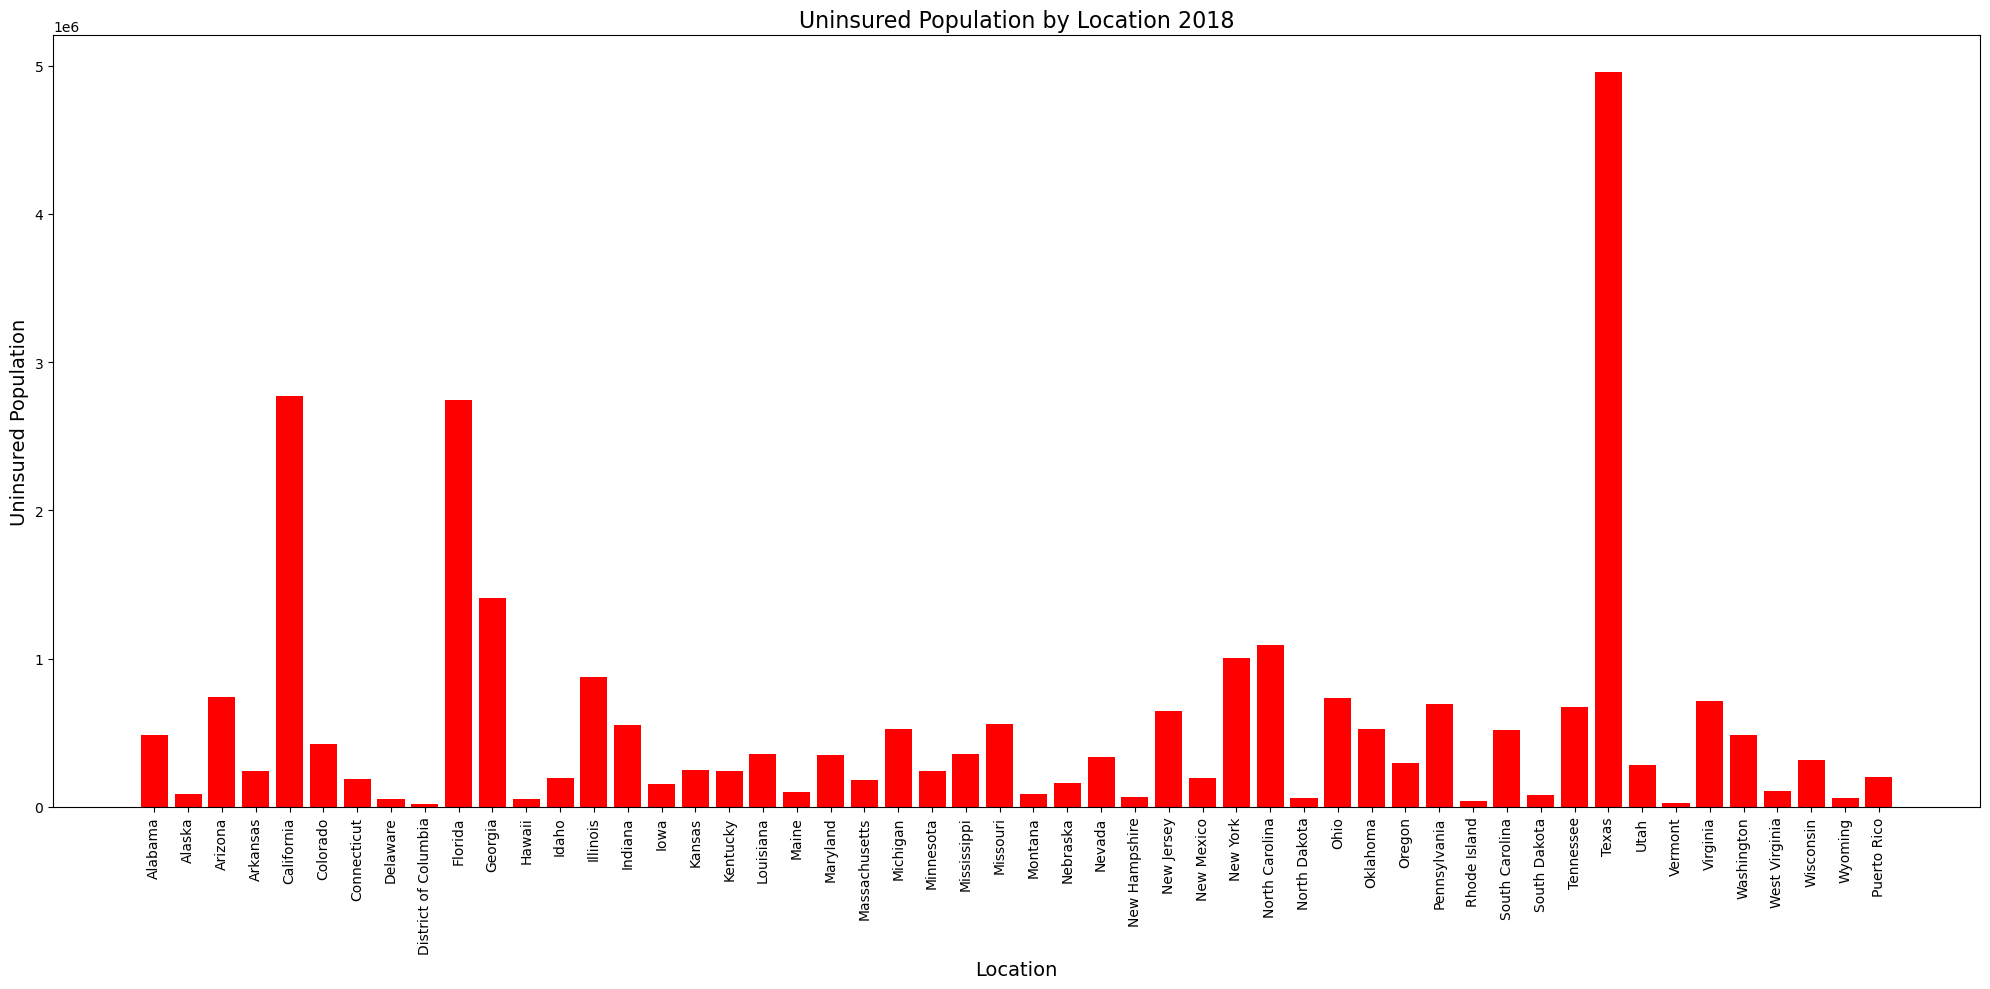

In [22]:
#2018 
# Plot uninsured people by location

# Convert Medicaid and Uninsured columns to numeric


# Drop rows with NaN values in the Uninsured column
# Plot uninsured people by location with commas for thousands separators
plt.figure(figsize=(20, 10))  # Increase the figure size
bars = plt.bar(df_2018['Location'], df_2018['Uninsured'], color='red')
plt.xlabel('Location', fontsize=14)  # Increase the font size of the labels
plt.ylabel('Uninsured Population', fontsize=14)
plt.title('Uninsured Population by Location 2018', fontsize=16)
plt.xticks(rotation=90, fontsize=10)  # Rotate labels for better spacing and adjust font size
plt.yticks(fontsize=10)
plt.tight_layout()

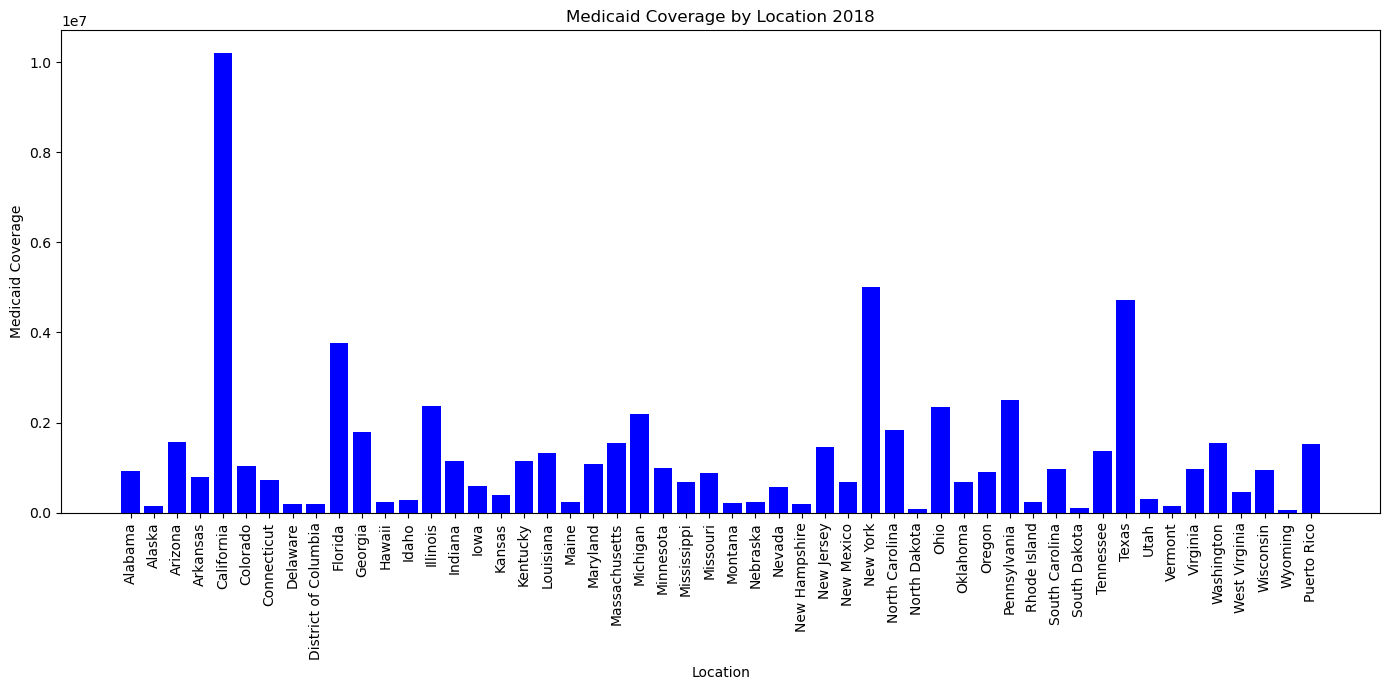

In [23]:
# Plot Medicaid coverage by location
plt.figure(figsize=(14, 7))
plt.bar(df_2018['Location'], df_2018['Medicaid'], color='blue')
plt.xlabel('Location')
plt.ylabel('Medicaid Coverage')
plt.title('Medicaid Coverage by Location 2018')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

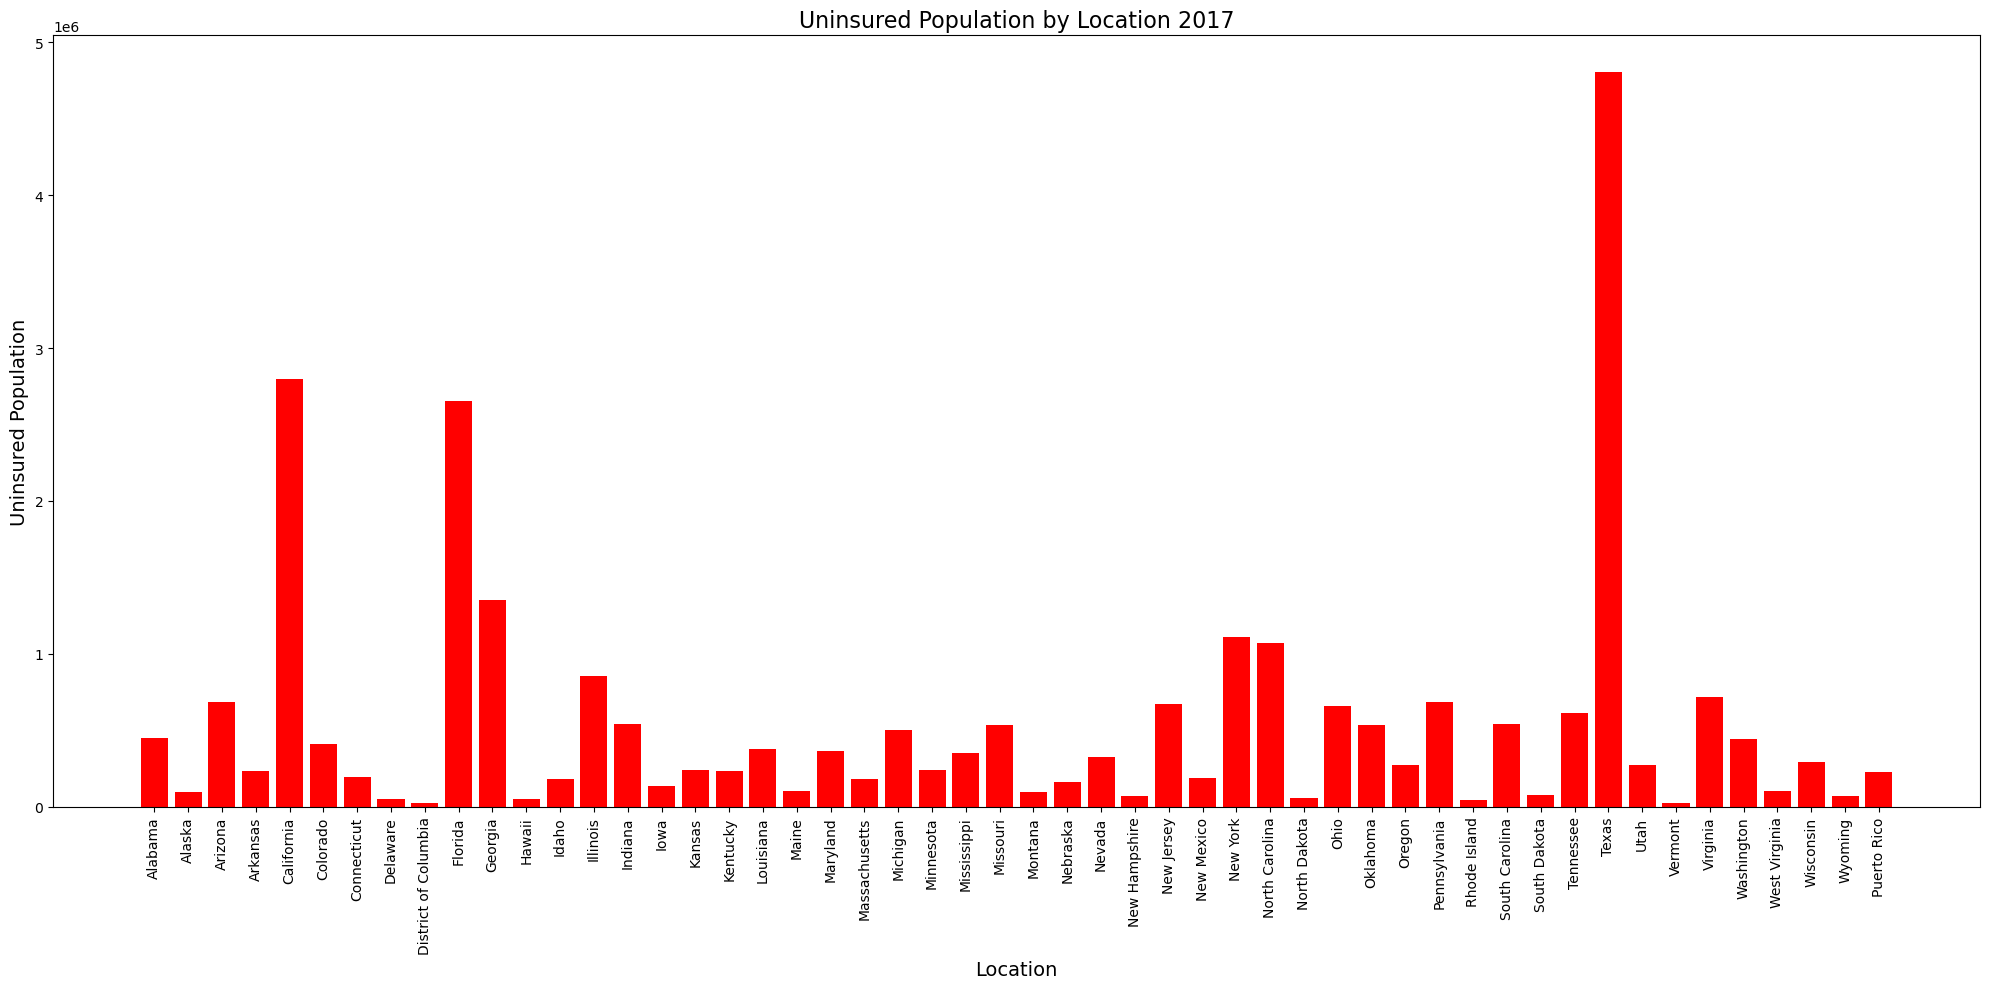

In [24]:
#2017 
# Plot uninsured people by location

# Convert Medicaid and Uninsured columns to numeric


# Drop rows with NaN values in the Uninsured column
# Plot uninsured people by location with commas for thousands separators
plt.figure(figsize=(20, 10))  # Increase the figure size
bars = plt.bar(df_2017['Location'], df_2017['Uninsured'], color='red')
plt.xlabel('Location', fontsize=14)  # Increase the font size of the labels
plt.ylabel('Uninsured Population', fontsize=14)
plt.title('Uninsured Population by Location 2017', fontsize=16)
plt.xticks(rotation=90, fontsize=10)  # Rotate labels for better spacing and adjust font size
plt.yticks(fontsize=10)
plt.tight_layout()

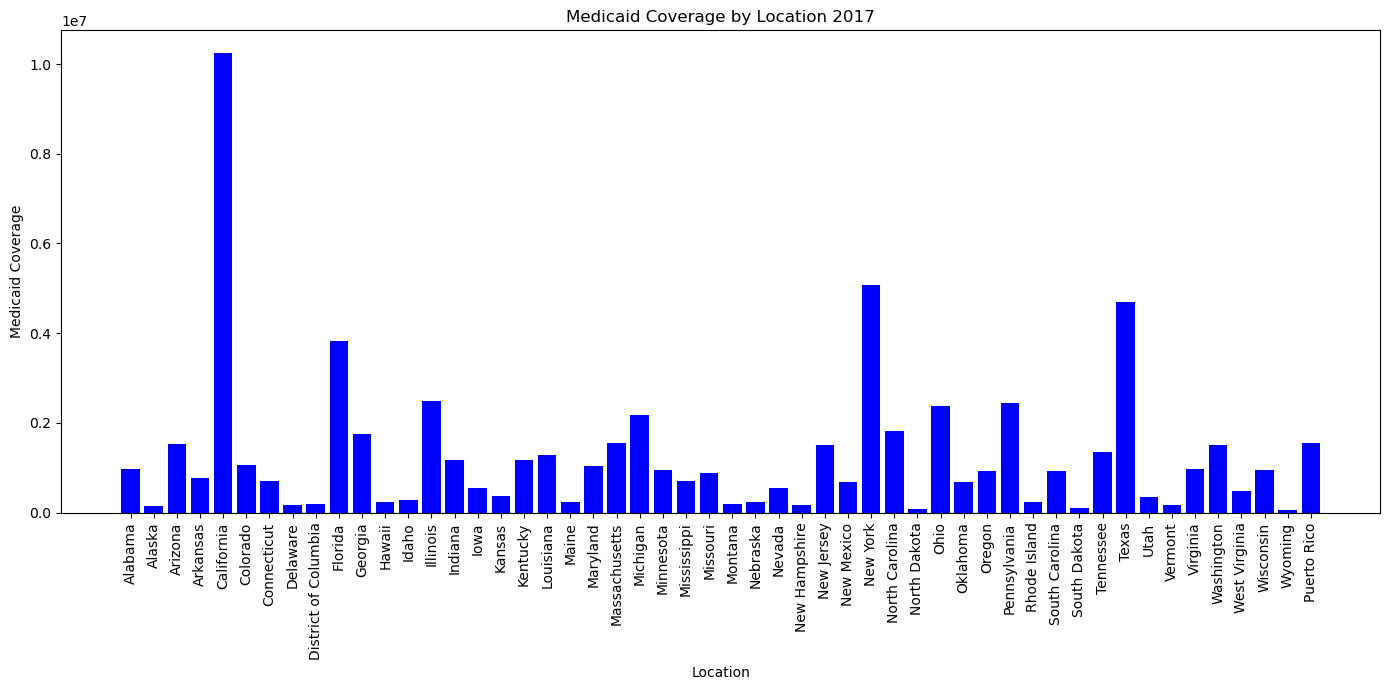

In [26]:
# Plot Medicaid coverage by location
plt.figure(figsize=(14, 7))
plt.bar(df_2017['Location'], df_2017['Medicaid'], color='blue')
plt.xlabel('Location')
plt.ylabel('Medicaid Coverage')
plt.title('Medicaid Coverage by Location 2017')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

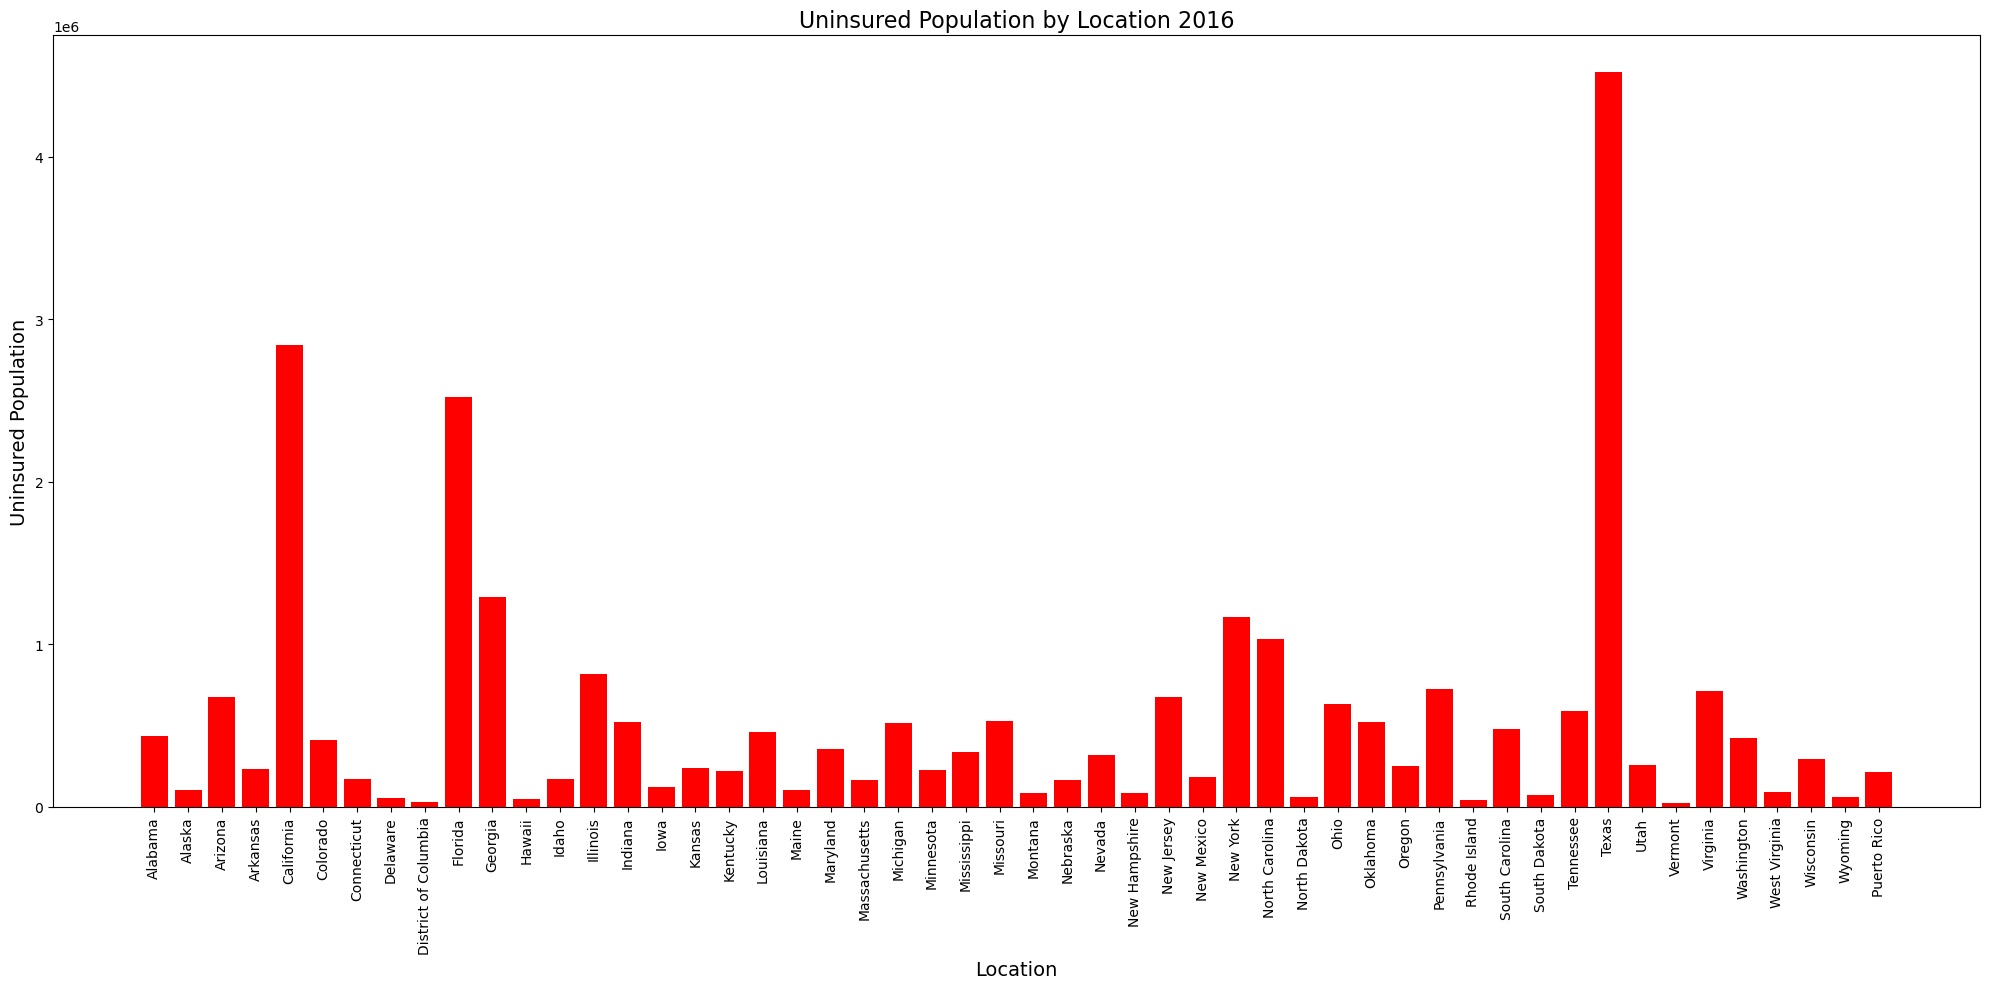

In [27]:
# Plot uninsured people by location
# Convert Medicaid and Uninsured columns to numeric


# Drop rows with NaN values in the Uninsured column
# Plot uninsured people by location with commas for thousands separators
plt.figure(figsize=(20, 10))  # Increase the figure size
bars = plt.bar(df_2016['Location'], df_2016['Uninsured'], color='red')
plt.xlabel('Location', fontsize=14)  # Increase the font size of the labels
plt.ylabel('Uninsured Population', fontsize=14)
plt.title('Uninsured Population by Location 2016', fontsize=16)
plt.xticks(rotation=90, fontsize=10)  # Rotate labels for better spacing and adjust font size
plt.yticks(fontsize=10)
plt.tight_layout()

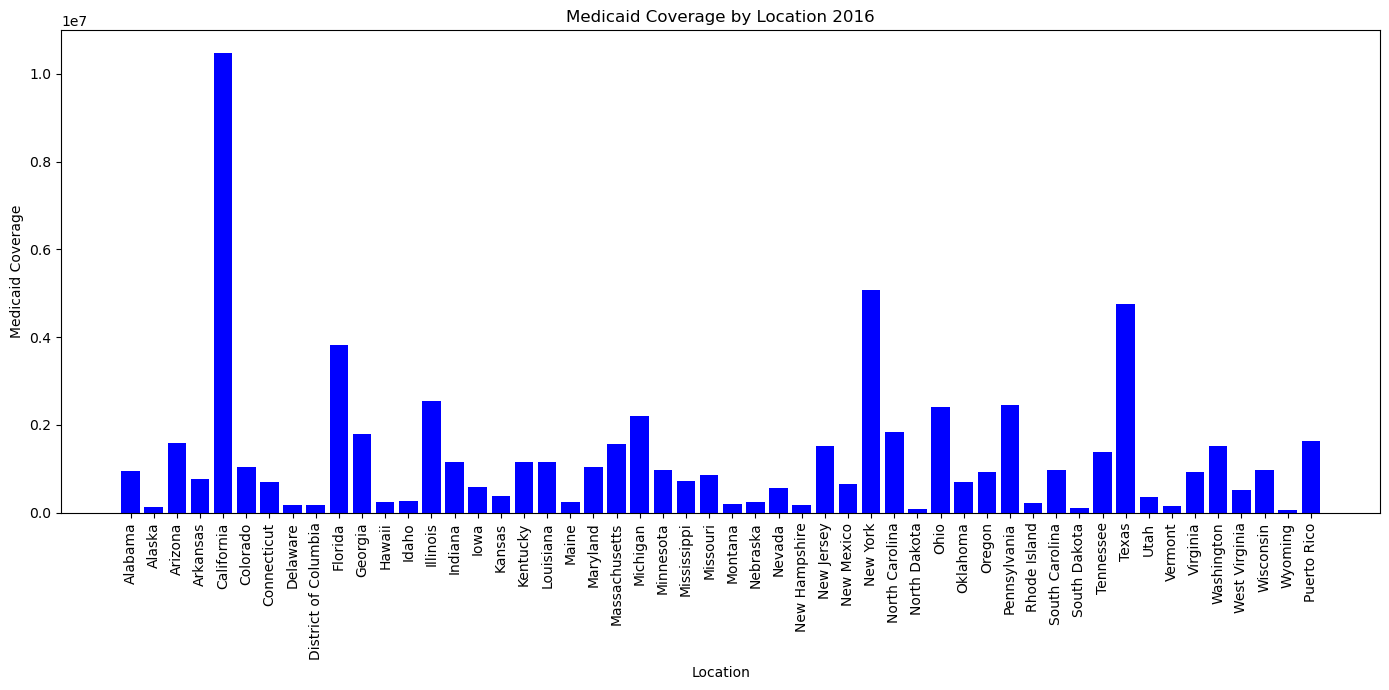

In [29]:
# Plot Medicaid coverage by location
plt.figure(figsize=(14, 7))
plt.bar(df_2016['Location'], df_2016['Medicaid'], color='blue')
plt.xlabel('Location')
plt.ylabel('Medicaid Coverage')
plt.title('Medicaid Coverage by Location 2016')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

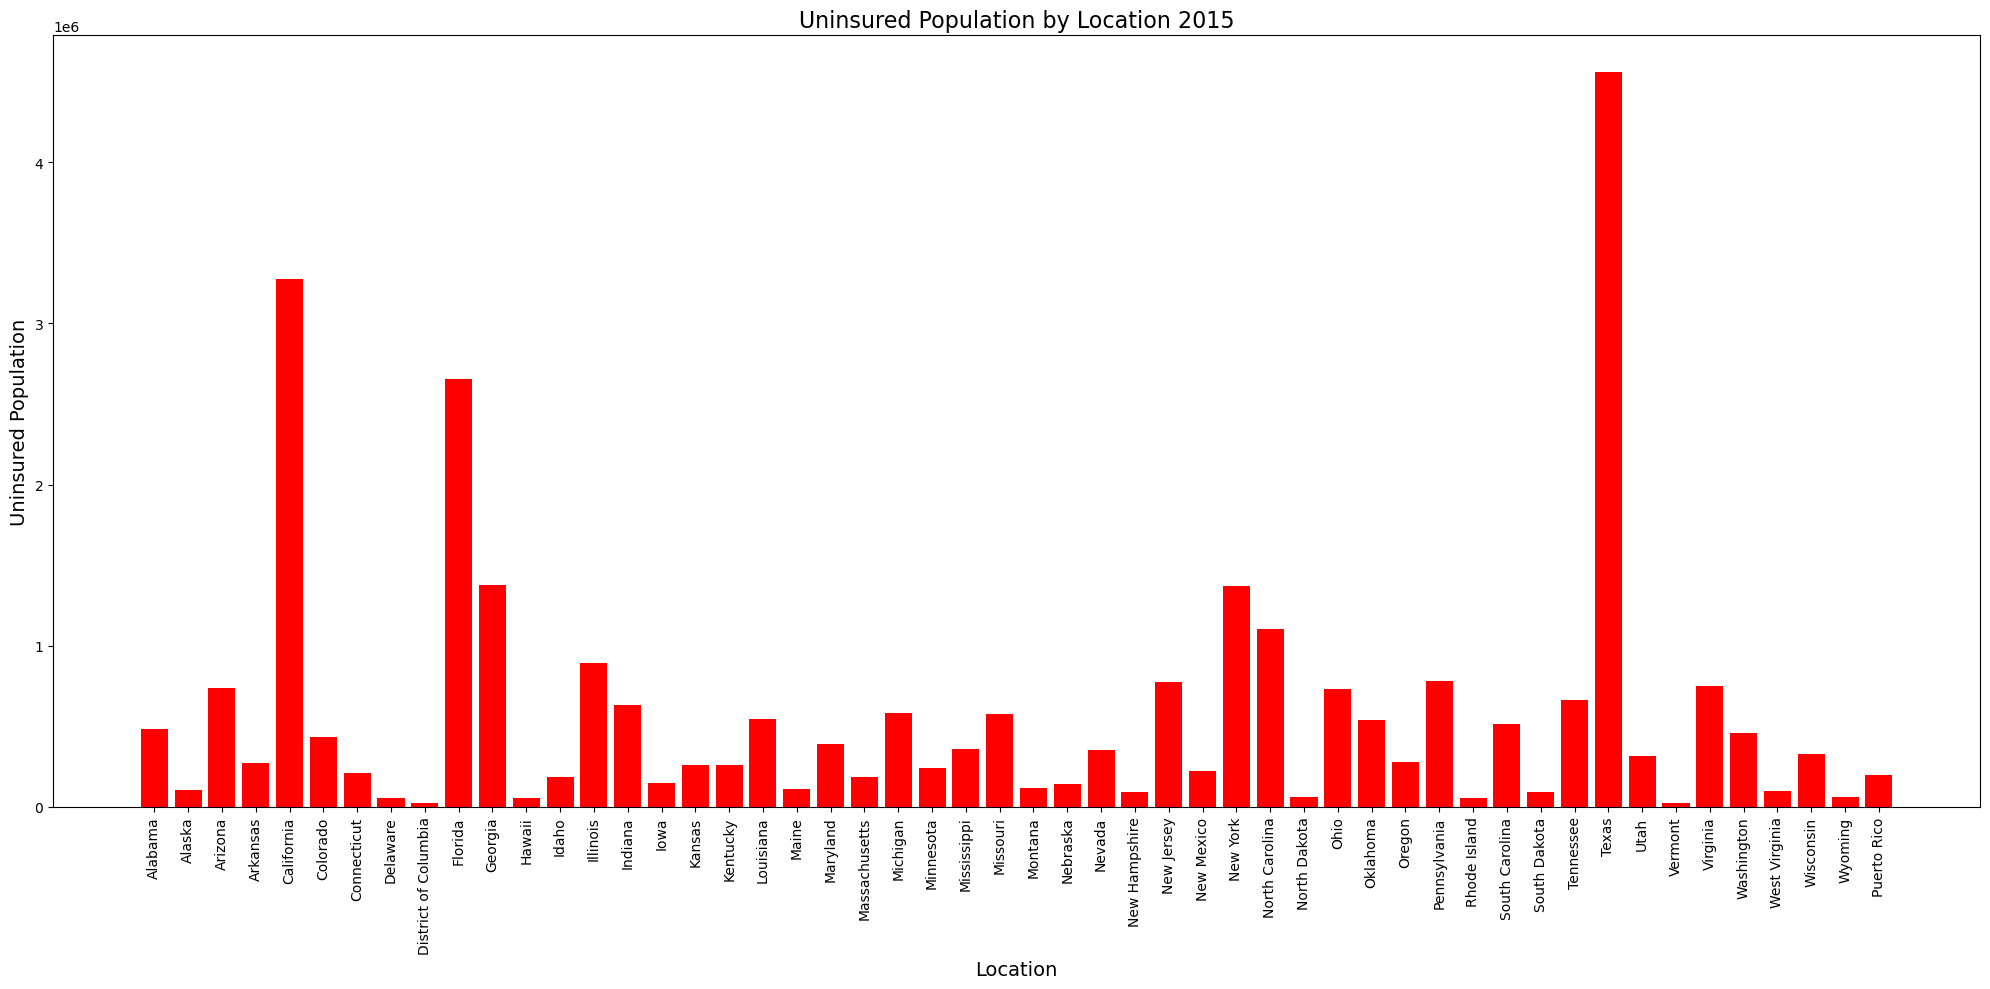

In [30]:
# Plot uninsured people by location
# Convert Medicaid and Uninsured columns to numeric


# Drop rows with NaN values in the Uninsured column
# Plot uninsured people by location with commas for thousands separators
plt.figure(figsize=(20, 10))  # Increase the figure size
bars = plt.bar(df_2015['Location'], df_2015['Uninsured'], color='red')
plt.xlabel('Location', fontsize=14)  # Increase the font size of the labels
plt.ylabel('Uninsured Population', fontsize=14)
plt.title('Uninsured Population by Location 2015', fontsize=16)
plt.xticks(rotation=90, fontsize=10)  # Rotate labels for better spacing and adjust font size
plt.yticks(fontsize=10)
plt.tight_layout()

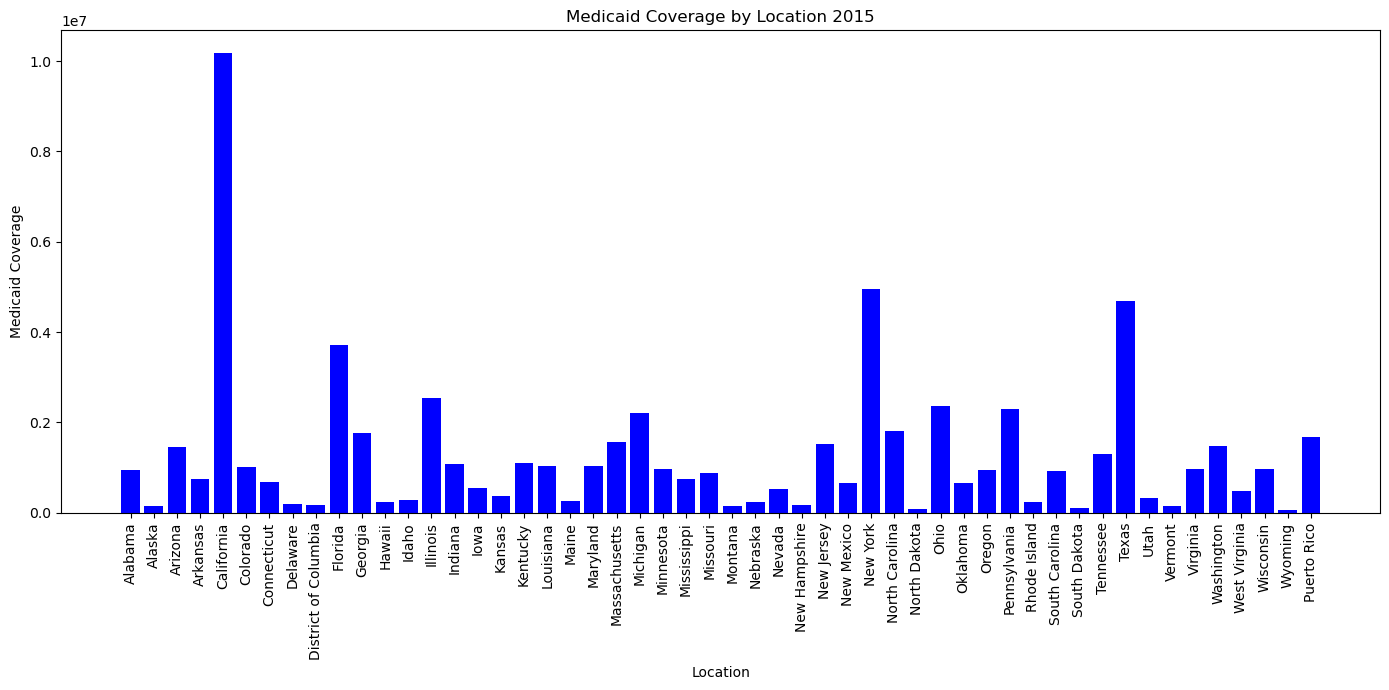

In [32]:
# Plot Medicaid coverage by location
plt.figure(figsize=(14, 7))
plt.bar(df_2015['Location'], df_2015['Medicaid'], color='blue')
plt.xlabel('Location')
plt.ylabel('Medicaid Coverage')
plt.title('Medicaid Coverage by Location 2015')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

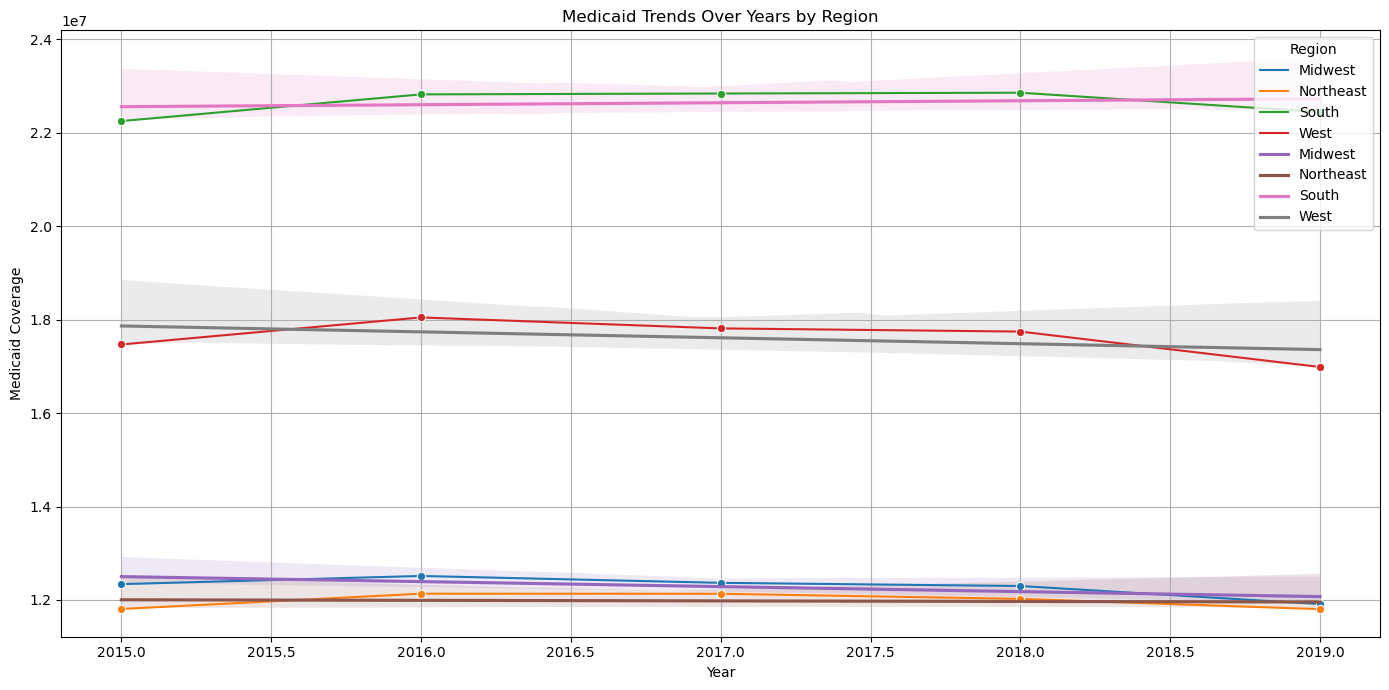

c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

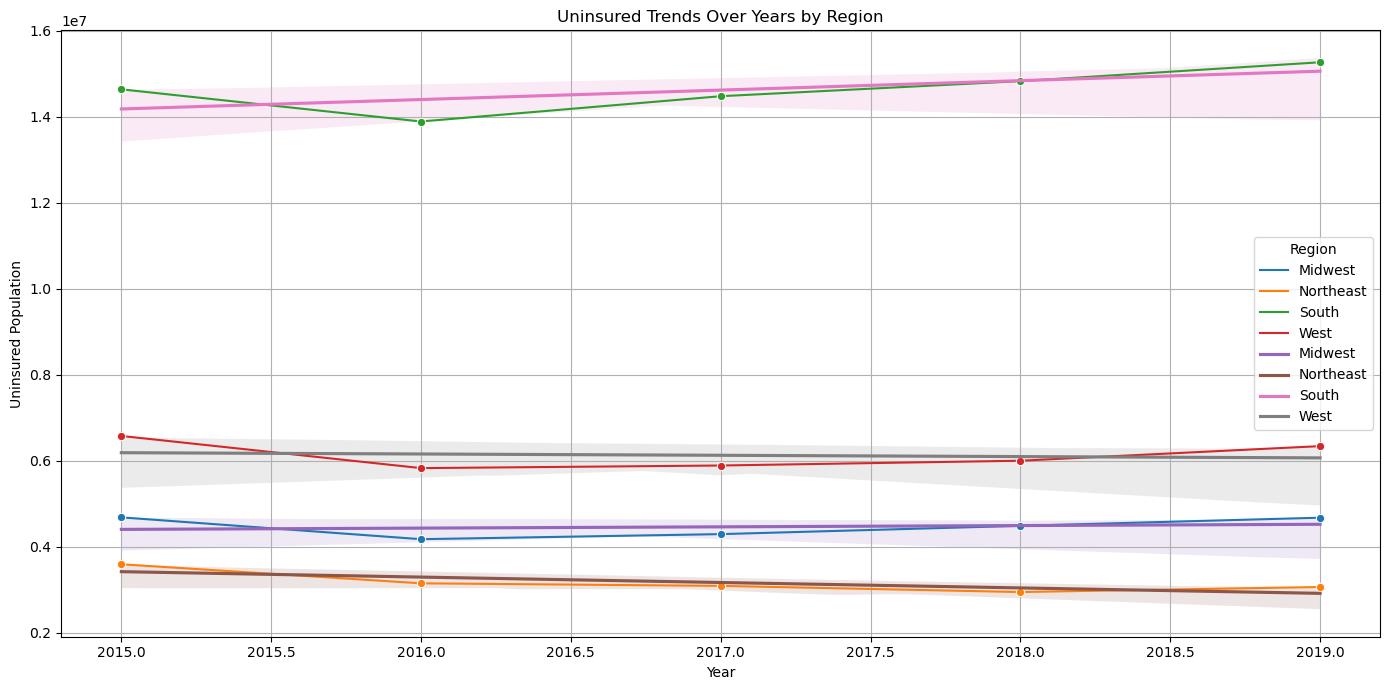

In [83]:
# Add a year column to each dataframe
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019

# Rename columns if necessary
for df in [df_2015, df_2016, df_2017, df_2018, df_2019]:
    df.rename(columns={'location': 'Location', 'medicaid': 'Medicaid', 'uninsured': 'Uninsured'}, inplace=True)

# Concatenate all dataframes
combined_df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)

# Define the regions for each state
regions = {
    "Northeast": ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont", 
                  "New Jersey", "New York", "Pennsylvania"],
    "Midwest": ["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin", "Iowa", "Kansas", "Minnesota", 
                "Missouri", "Nebraska", "North Dakota", "South Dakota"],
    "South": ["Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", "Virginia", 
              "District of Columbia", "West Virginia", "Alabama", "Kentucky", "Mississippi", "Tennessee", 
              "Arkansas", "Louisiana", "Oklahoma", "Texas"],
    "West": ["Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", "Utah", "Wyoming", 
             "Alaska", "California", "Hawaii", "Oregon", "Washington"]
}

# Create a mapping from state to region
state_to_region = {}
for region, states in regions.items():
    for state in states:
        state_to_region[state] = region

# Add a region column to the dataframe
combined_df['Region'] = combined_df['Location'].map(state_to_region)

# Replace infinite values with NaN
combined_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Drop any remaining rows with NaN values
combined_df.dropna(inplace=True)

# Create a pivot table with years as columns and region and location as indices
pivot_df = combined_df.pivot_table(
    index=['Region', 'Location'],
    columns='Year',
    values=['Medicaid', 'Uninsured'],
    aggfunc='sum'
)

# Reorder the columns to have Medicaid and Uninsured in sequence for each year
pivot_df = pivot_df.swaplevel(axis=1).sort_index(axis=1)

# Display the pivot table
display(HTML(pivot_df.to_html()))

# Group by Region and Year and sum the values
trend_df = combined_df.groupby(['Region', 'Year']).sum(numeric_only=True).reset_index()

# Plot Medicaid trends over the years by region with trend lines
plt.figure(figsize=(14, 7))
sns.lineplot(data=trend_df, x='Year', y='Medicaid', hue='Region', marker='o')
for region in trend_df['Region'].unique():
    sns.regplot(data=trend_df[trend_df['Region'] == region], x='Year', y='Medicaid', scatter=False, label=region)
plt.title('Medicaid Trends Over Years by Region')
plt.xlabel('Year')
plt.ylabel('Medicaid Coverage')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Uninsured trends over the years by region with trend lines
plt.figure(figsize=(14, 7))
sns.lineplot(data=trend_df, x='Year', y='Uninsured', hue='Region', marker='o')
for region in trend_df['Region'].unique():
    sns.regplot(data=trend_df[trend_df['Region'] == region], x='Year', y='Uninsured', scatter=False, label=region)
plt.title('Uninsured Trends Over Years by Region')
plt.xlabel('Year')
plt.ylabel('Uninsured Population')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

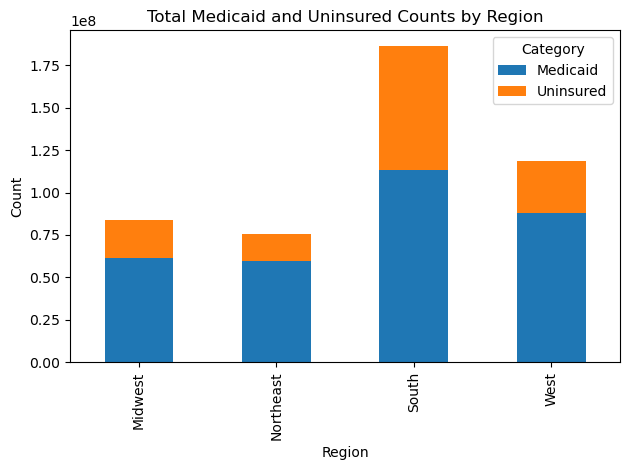

In [85]:
# Group by region and calculate the total Medicaid and Uninsured counts
region_totals = combined_df.groupby('Region')[['Medicaid', 'Uninsured']].sum().reset_index()

# Plot total Medicaid and Uninsured counts by region
plt.figure(figsize=(14, 7))
region_totals.set_index('Region').plot(kind='bar', stacked=True)
plt.title('Total Medicaid and Uninsured Counts by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

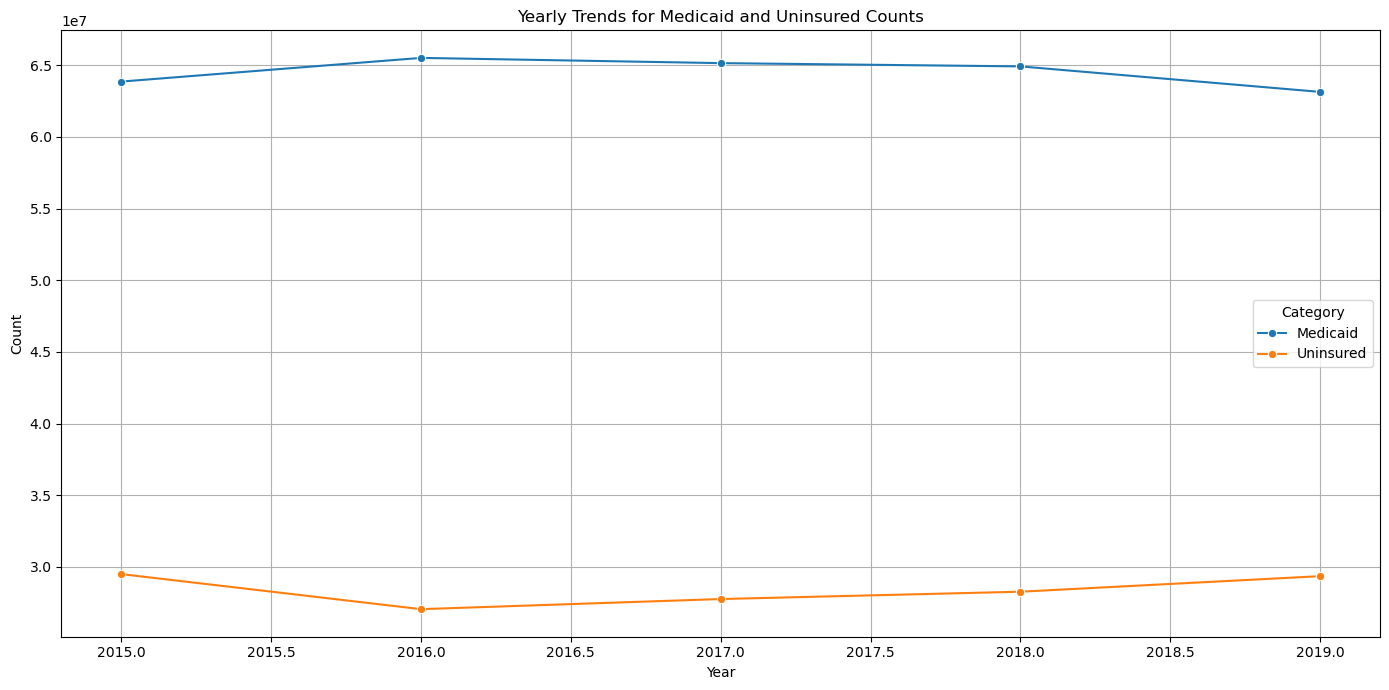

In [86]:
# Group by year and calculate the total Medicaid and Uninsured counts
yearly_totals = combined_df.groupby('Year')[['Medicaid', 'Uninsured']].sum().reset_index()

# Plot yearly trends for Medicaid and Uninsured counts
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_totals, x='Year', y='Medicaid', marker='o', label='Medicaid')
sns.lineplot(data=yearly_totals, x='Year', y='Uninsured', marker='o', label='Uninsured')
plt.title('Yearly Trends for Medicaid and Uninsured Counts')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()
plt.show()

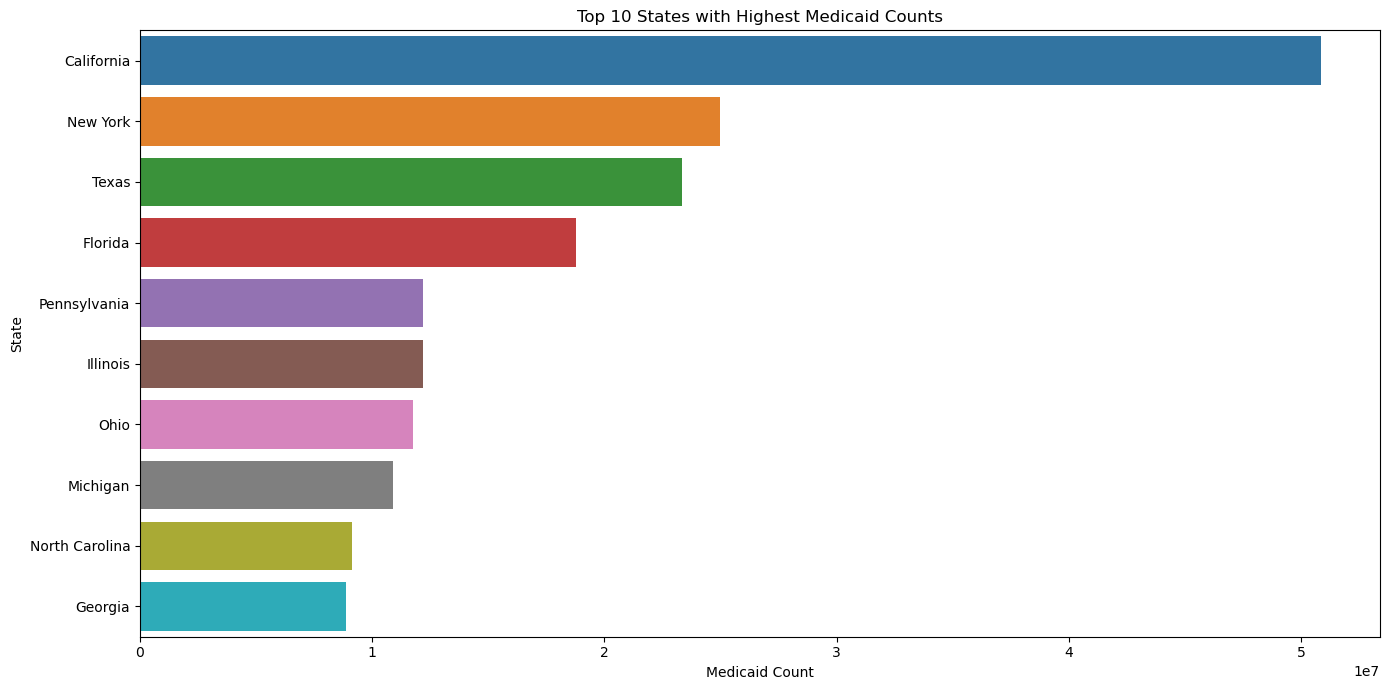

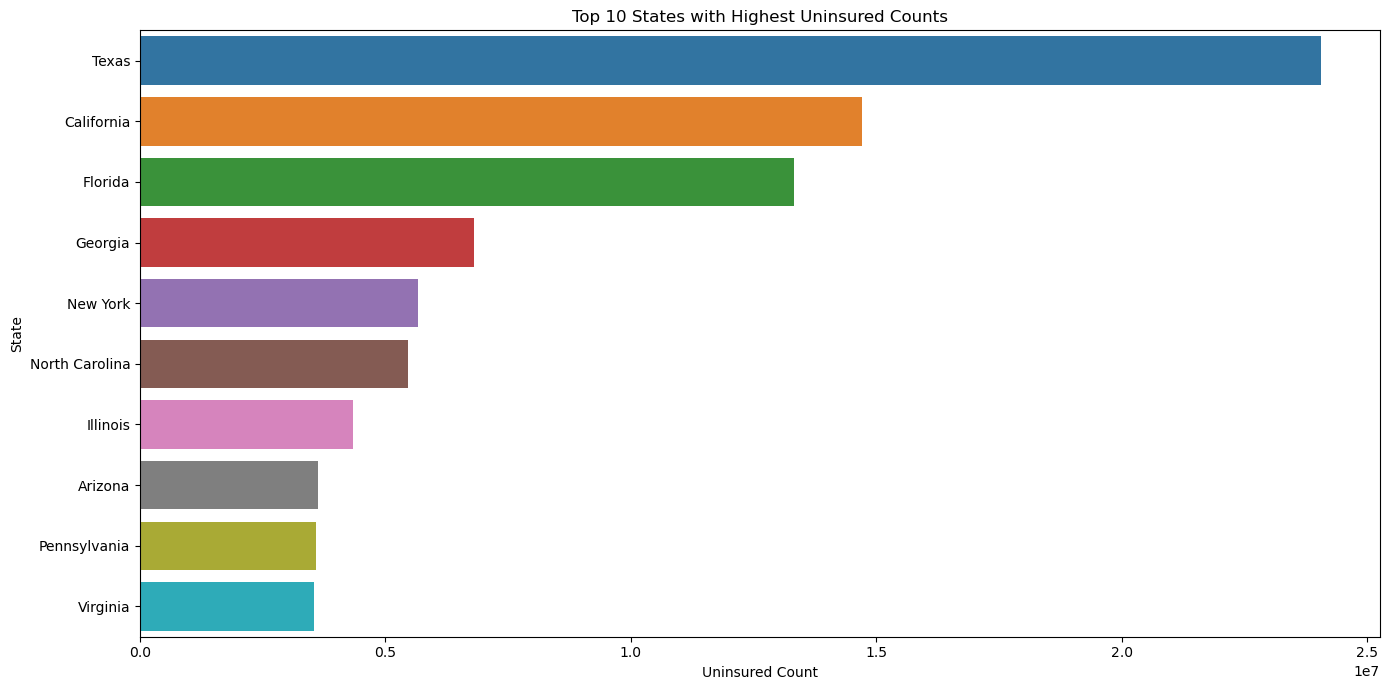

In [87]:
# Identify the top states with the highest Medicaid and Uninsured counts
top_states_medicaid = combined_df.groupby('Location')['Medicaid'].sum().nlargest(10).reset_index()
top_states_uninsured = combined_df.groupby('Location')['Uninsured'].sum().nlargest(10).reset_index()

# Plot top states with the highest Medicaid counts
plt.figure(figsize=(14, 7))
sns.barplot(data=top_states_medicaid, x='Medicaid', y='Location')
plt.title('Top 10 States with Highest Medicaid Counts')
plt.xlabel('Medicaid Count')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# Plot top states with the highest Uninsured counts
plt.figure(figsize=(14, 7))
sns.barplot(data=top_states_uninsured, x='Uninsured', y='Location')
plt.title('Top 10 States with Highest Uninsured Counts')
plt.xlabel('Uninsured Count')
plt.ylabel('State')
plt.tight_layout()
plt.show()

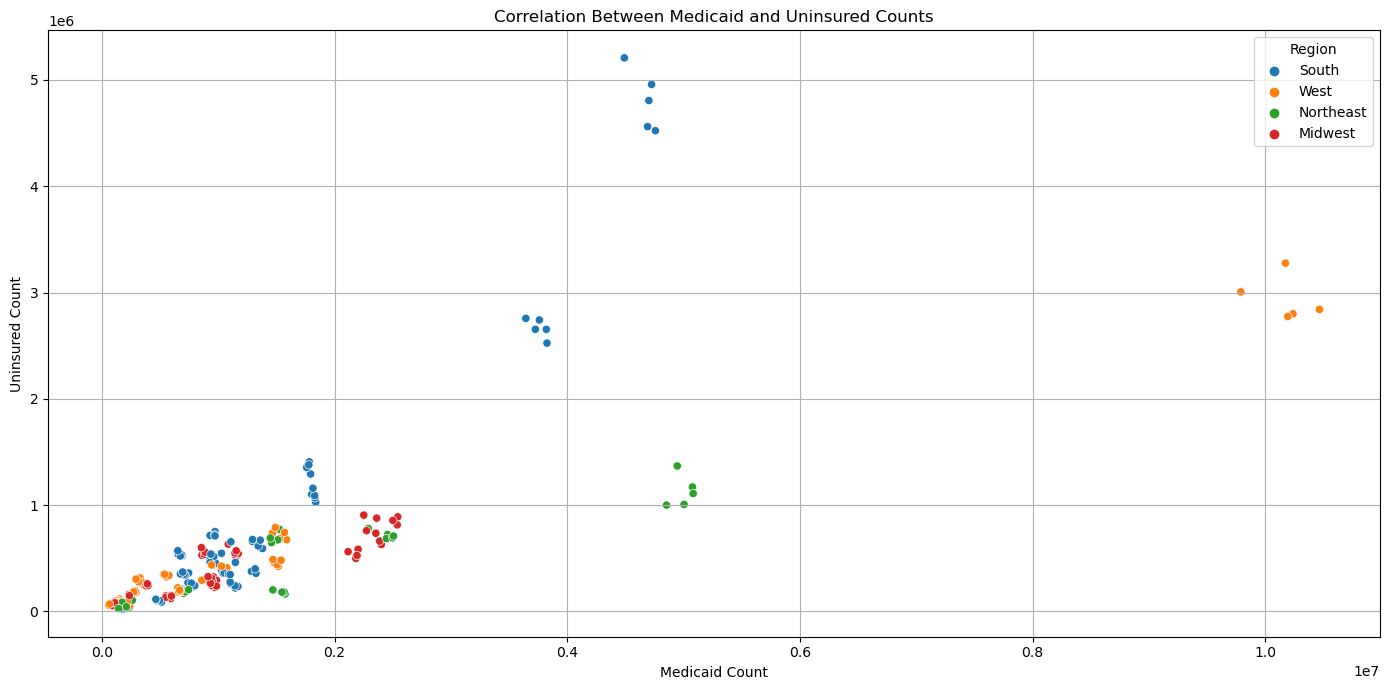

Correlation Coefficient:
           Medicaid  Uninsured
Medicaid   1.000000   0.779519
Uninsured  0.779519   1.000000


In [88]:
# Scatter plot to analyze the correlation between Medicaid and Uninsured counts
plt.figure(figsize=(14, 7))
sns.scatterplot(data=combined_df, x='Medicaid', y='Uninsured', hue='Region')
plt.title('Correlation Between Medicaid and Uninsured Counts')
plt.xlabel('Medicaid Count')
plt.ylabel('Uninsured Count')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient
correlation = combined_df[['Medicaid', 'Uninsured']].corr()
print("Correlation Coefficient:")
print(correlation)

c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


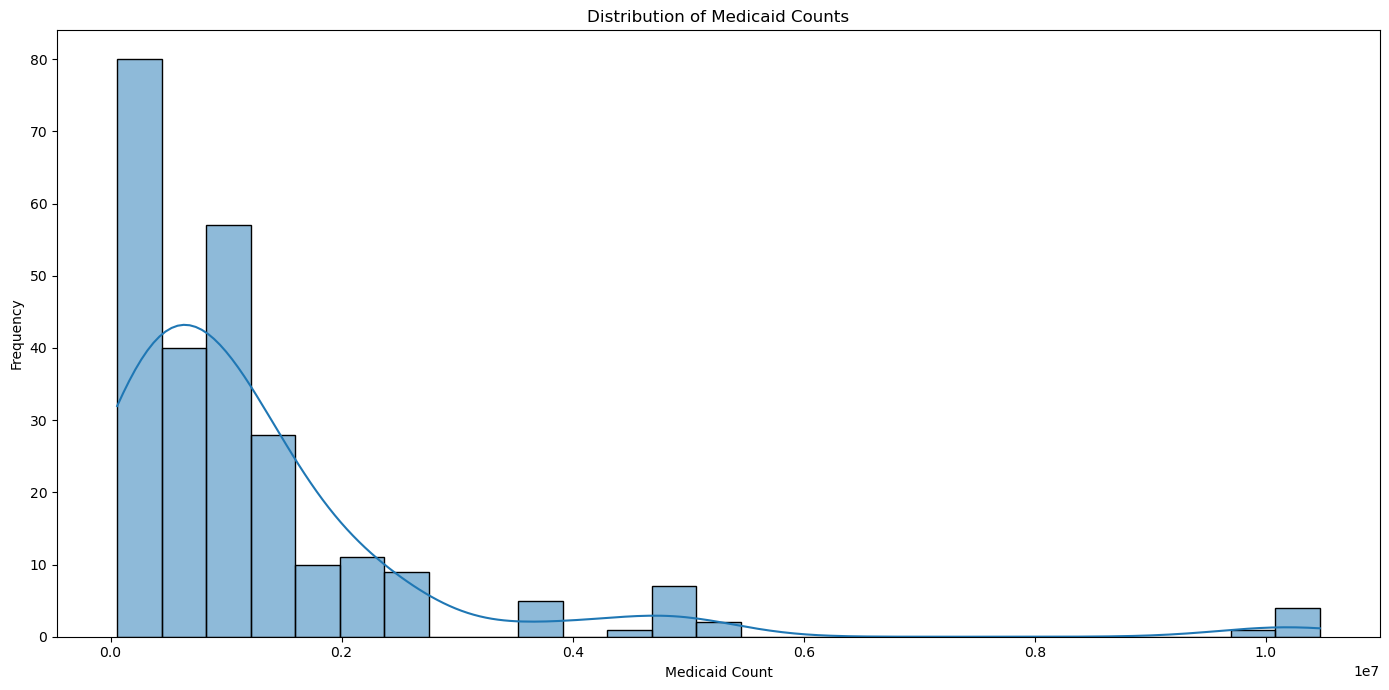

c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


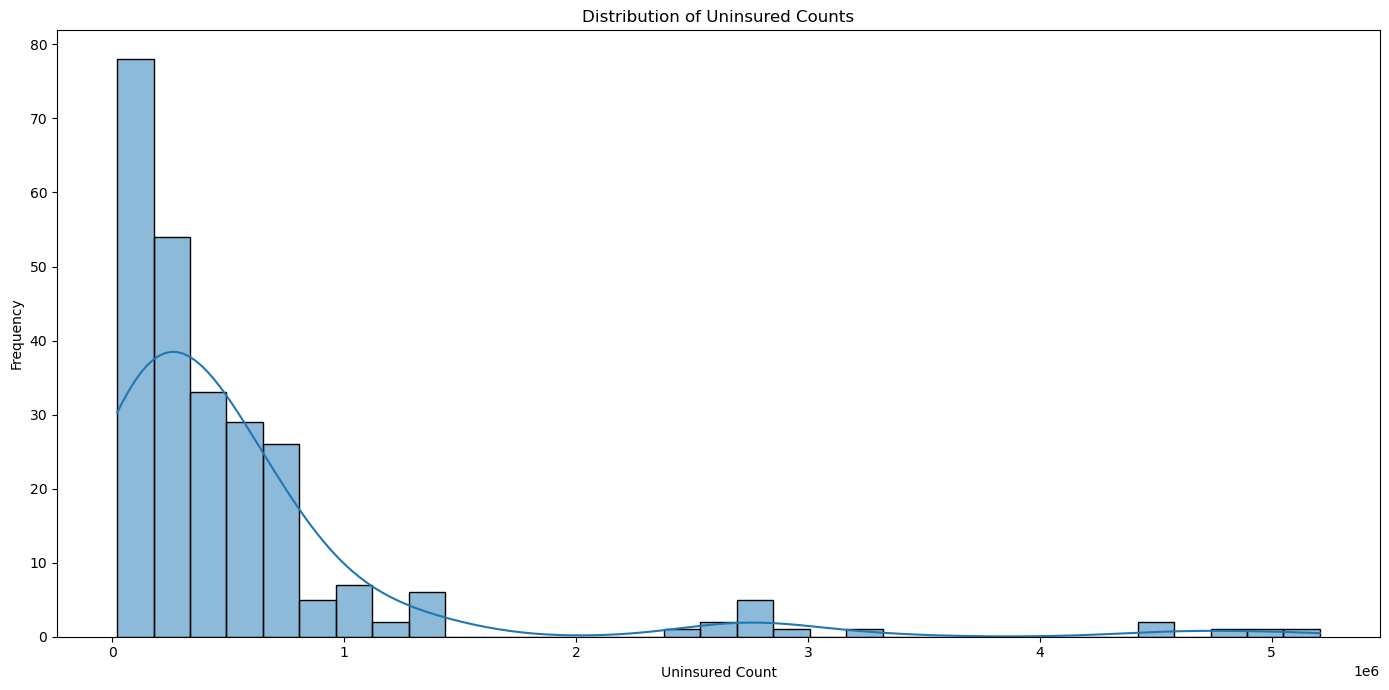

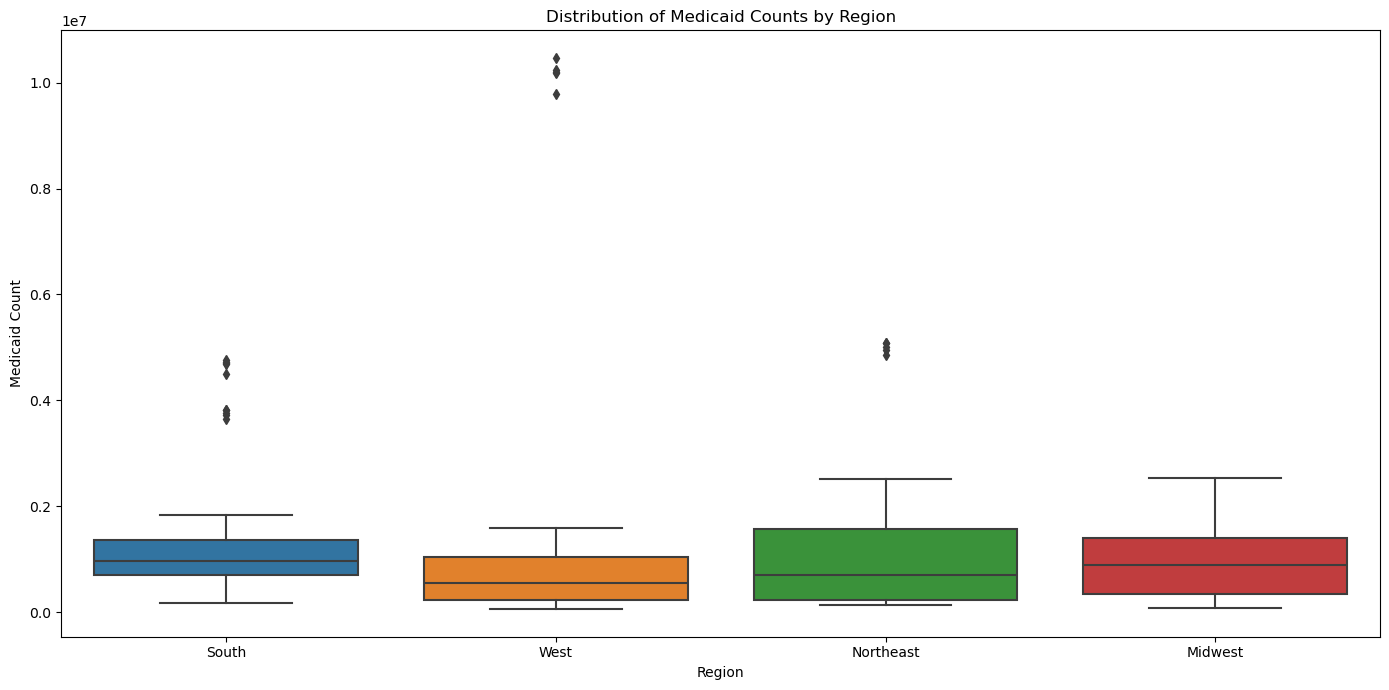

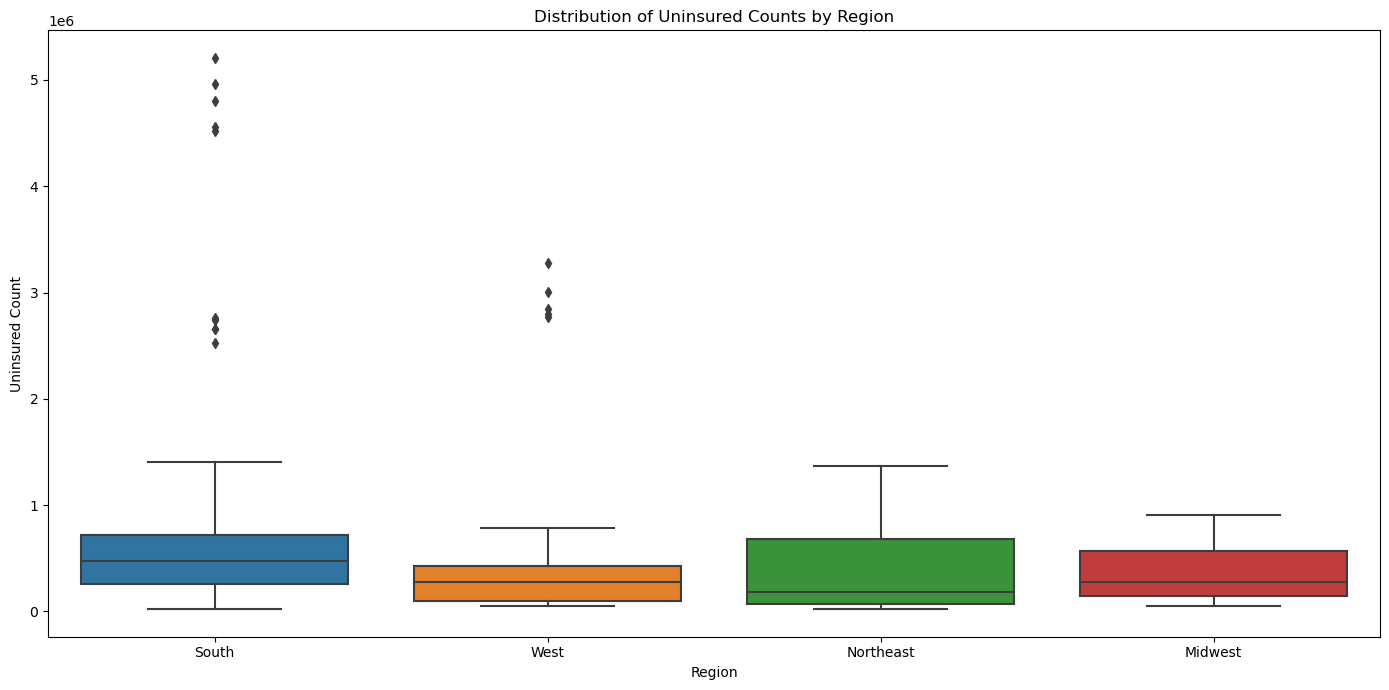

In [89]:
# Histograms to analyze the distribution of Medicaid and Uninsured counts
plt.figure(figsize=(14, 7))
sns.histplot(data=combined_df, x='Medicaid', kde=True)
plt.title('Distribution of Medicaid Counts')
plt.xlabel('Medicaid Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.histplot(data=combined_df, x='Uninsured', kde=True)
plt.title('Distribution of Uninsured Counts')
plt.xlabel('Uninsured Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box plots to analyze the distribution of Medicaid and Uninsured counts by region
plt.figure(figsize=(14, 7))
sns.boxplot(data=combined_df, x='Region', y='Medicaid')
plt.title('Distribution of Medicaid Counts by Region')
plt.xlabel('Region')
plt.ylabel('Medicaid Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(data=combined_df, x='Region', y='Uninsured')
plt.title('Distribution of Uninsured Counts by Region')
plt.xlabel('Region')
plt.ylabel('Uninsured Count')
plt.tight_layout()
plt.show()